<a href="https://colab.research.google.com/github/ASO1801040/AI_tech2020/blob/master/2020AI0302_detect_mosaic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import matplotlib.pyplot as plt
import cv2
import urllib.request as req
from google.colab.patches import cv2_imshow

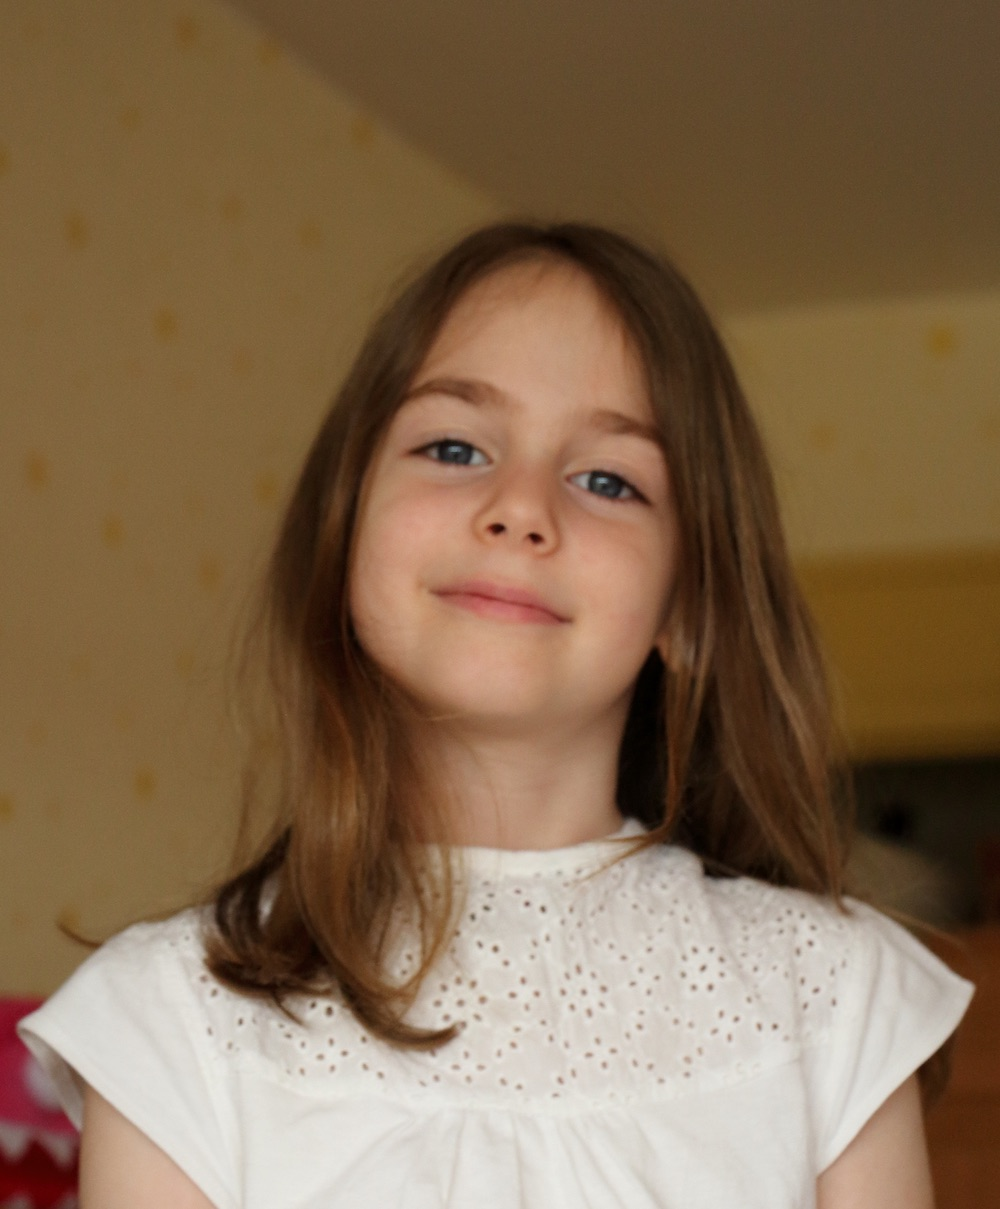

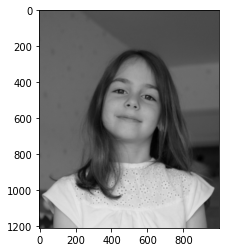

In [48]:
url = "https://raw.githubusercontent.com/masatokg/book-mlearn-gyomu/master/src/ch3/face/girl.jpg"
savefile = "girl.png"
req.urlretrieve(url,savefile)
img = cv2.imread(savefile)
cv2_imshow(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

In [41]:
url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml"
cascade_file = "cascade_file.xml"

req.urlretrieve(url, cascade_file)
cascade = cv2.CascadeClassifier(cascade_file)

In [42]:
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
if len(face_list) == 0:
  print("検出数は0でした")
else:
  print( "検出数は", len(face_list), "件" )

検出数は 1 件


In [43]:
for (x, y, w, h) in face_list:
  print("顔の座標: x=", x, " y=", y, "横幅W=", w, " 縦幅H=", h)
  red = ( 0, 0, 255)  
  cv2.rectangle( img, (x,y), (x+w, y+h), red, thickness=20 )


顔の座標: x= 319  y= 308 横幅W= 405  縦幅H= 405


In [44]:
# モザイク用の関数
def mosaic( img, rect, size ):
  
  (x1, y1, x2, y2) = rect 
  w = x2 - x1 
  h = y2 - y1 
  i_rect = img[ y1:y2, x1:x2 ]
  i_small = cv2.resize( i_rect, ( size, size ) )
  i_mos = cv2.resize( i_small, (w, h), interpolation=cv2.INTER_AREA )
  img2 = img.copy()
  img2[y1:y2, x1:x2] = i_mos
  return img2 

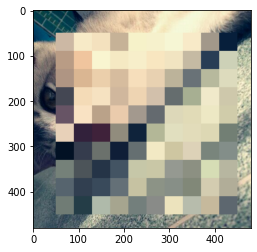

In [45]:
url = "https://github.com/masatokg/book-mlearn-gyomu/raw/master/src/ch3/face/cat.jpg"
cat_file = "cat.png"
req.urlretrieve( url, cat_file )
img_cat = cv2.imread(cat_file)
mos = mosaic( img_cat, (50, 50, 450, 450), 10 )
cv2.imwrite("cat-mosaic.png", mos)
plt.imshow( cv2.cvtColor( mos, cv2.COLOR_BGR2RGB ) )
plt.show()

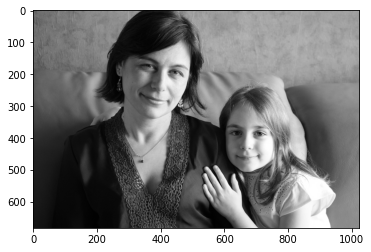

In [46]:
cascade = cv2.CascadeClassifier(cascade_file)

url = "https://raw.githubusercontent.com/masatokg/book-mlearn-gyomu/master/src/ch3/face/family.jpg"
family_file = "fmalily.png"

req.urlretrieve(url, family_file)

img_family = cv2.imread( family_file )
img_family_gray = cv2.cvtColor( img_family, cv2.COLOR_BGR2GRAY )

plt.imshow( cv2.cvtColor( img_family_gray, cv2.COLOR_BGR2RGB ) )
plt.show()

2 件見つかりました！


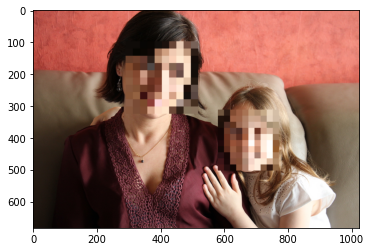

In [47]:
face_list = cascade.detectMultiScale( img_family_gray, minSize=(150, 150) )

if len(face_list)==0: print("顔が見つかりませんでした")
else : print( len(face_list), "件見つかりました！" )

for( x, y, w, h ) in face_list:
  img_family = mosaic( img_family, (x, y, x+w, y+h), 10 )

cv2.imwrite( "family-mosaic.png", img_family ) 

plt.imshow( cv2.cvtColor( img_family, cv2.COLOR_BGR2RGB ) )
plt.show()